# Árbol de decisión con clasificación
El objetivo es contruir un modelo de clasificación medinate Árboles de Decisión usando datos sintéticos.

author: Virginia Ordoño Bernier

date: January 2024

### 1. Carga de datos

In [1]:
import pandas as pd

csv = './data/data2.csv'
data = pd.read_csv(csv)
df_data2 = pd.DataFrame(data)
print(df_data2.head())

   Feature_1  Feature_2  Label
0   0.496714   0.000000    0.0
1   0.647689   1.523030    0.0
2   0.000000   0.000000    0.0
3   1.579213   0.767435    0.0
4   0.000000   0.542560    0.0


### 2. Preprocesamiento de datos

In [2]:
# Label column to int
df_data2['Label'] = df_data2['Label'].astype(int)
print(df_data2.head())

   Feature_1  Feature_2  Label
0   0.496714   0.000000      0
1   0.647689   1.523030      0
2   0.000000   0.000000      0
3   1.579213   0.767435      0
4   0.000000   0.542560      0


In [3]:
# Checking Label column values
df_data2['Label'].unique()

array([0, 1])

### 3. Gráfico de Dispersión

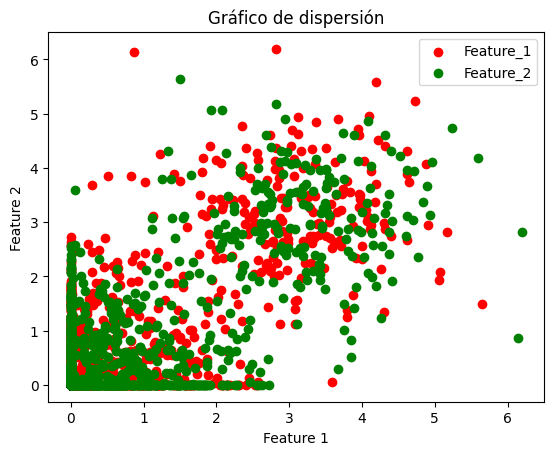

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df_data2['Feature_1'], df_data2['Feature_2'], c='red', label='Feature_1')
plt.scatter(df_data2['Feature_2'], df_data2['Feature_1'], c='green', label='Feature_2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de dispersión')

plt.legend()
plt.show()

### 4. Preparación de los datos para el entrenamiento

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_data2, test_size=0.33, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  Feature_1  Feature_2  Label
0    703   0.000000   1.501334      0
1    311   1.882024   1.345420      0
2    722   0.399688   0.000000      0
3    629   0.000000   0.000000      0
4      0   0.496714   0.000000      0

Conjunto de prueba:
   index  Feature_1  Feature_2  Label
0    521   1.078681   0.000000      0
1    737   0.000000   0.648280      0
2    740   0.722381   0.000000      0
3    660   0.056650   0.529693      0
4    411   2.298898   0.000000      0


### 5. Validación cruzada: optimización de parámetros

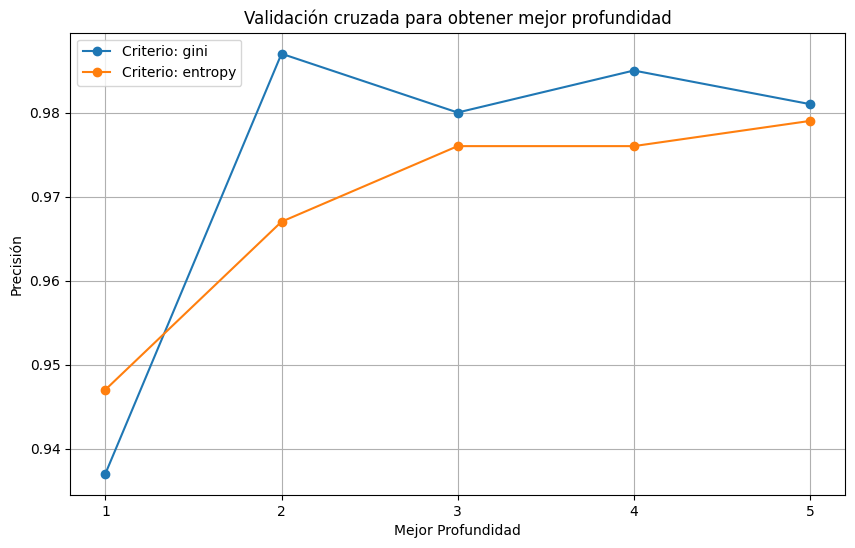


Gini
----------
Mejor profundidad: 2
Mayor Precisión: 0.9870000000000001

Entropía
----------
Mejor profundidad: 5
Mayor Precisión: 0.9789999999999999


In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

cv = KFold(n_splits=5, shuffle=True)

max_accuracy_gini = 0
best_depth_gini = 0
max_accuracy_entropy = 0
best_depth_entropy = 0

total_scores_gini = []
total_scores_entropy = []

# Depth range between one and double attributes number 
max_attributes = len(list(df_data2))
depth_range = range(1, max_attributes * 2)

for i, criterion in enumerate(['gini', 'entropy']):
    fold_accuracies = []  # Initialize fold_accuracies inside the loop

    for max_depth in depth_range:

        # Accuracy in each iteration
        fold_accuracy = []
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)

        for train_fold, test_fold in cv.split(df_data2):  # Fixed 'train' to 'df_data2'

            # Division train and test
            f_train = df_data2.loc[train_fold]
            f_test = df_data2.loc[test_fold]

            # Model training
            model.fit(X=f_train.drop(['Label'], axis=1), y=f_train['Label'])
            y_pred = model.predict(X=f_test.drop(['Label'], axis=1))
            acc = accuracy_score(f_test['Label'], y_pred)

            # Saving precision
            fold_accuracy.append(acc)

        # Calculate and store the average accuracy for the current depth
        avg_accuracy = np.mean(fold_accuracy)
        fold_accuracies.append(avg_accuracy)

    total_scores_gini.append(fold_accuracies) if criterion == 'gini' else total_scores_entropy.append(fold_accuracies)

    # Check if the current depth results in a bigger accuracy
    max_acc = max(fold_accuracies)
    if criterion == 'gini' and max_acc > max_accuracy_gini:
        max_accuracy_gini = max_acc
        best_depth_gini = depth_range[fold_accuracies.index(max_acc)]  # Use depth_range directly
    elif criterion == 'entropy' and max_acc > max_accuracy_entropy:
        max_accuracy_entropy = max_acc
        best_depth_entropy = depth_range[fold_accuracies.index(max_acc)]  # Use depth_range directly

# Plot the results
plt.figure(figsize=(10, 6))
for i, scores in enumerate(total_scores_gini):
    plt.plot(depth_range, scores, marker='o', linestyle='-', label=f'Criterio: gini')

for i, scores in enumerate(total_scores_entropy):
    plt.plot(depth_range, scores, marker='o', linestyle='-', label=f'Criterio: entropy')

plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Mejor Profundidad')
plt.ylabel('Precisión')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

# Gini
print('\nGini')
print('-'*10)
print(f"Mejor profundidad: {best_depth_gini}")
print(f"Mayor Precisión: {max_accuracy_gini}")

# Entropy
print('\nEntropía')
print('-'*10)
print(f"Mejor profundidad: {best_depth_entropy}")
print(f"Mayor Precisión: {max_accuracy_entropy}")


### 6. Creación del modelo con los mejores hiperparámetros

In [7]:
from sklearn.metrics import classification_report

X_train = train.drop(['Label', 'index'], axis=1)
y_train = train['Label']
X_test = test.drop(['Label', 'index'], axis=1)
y_test = test['Label']

model = DecisionTreeClassifier(max_depth = best_depth_entropy) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print("\nInforme de Clasificación")
print(classification_report(y_test, y_pred)) 


Informe de Clasificación
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       264
           1       0.97      0.92      0.95        66

    accuracy                           0.98       330
   macro avg       0.97      0.96      0.97       330
weighted avg       0.98      0.98      0.98       330



### 7. Visualizacion del árbol de decisión

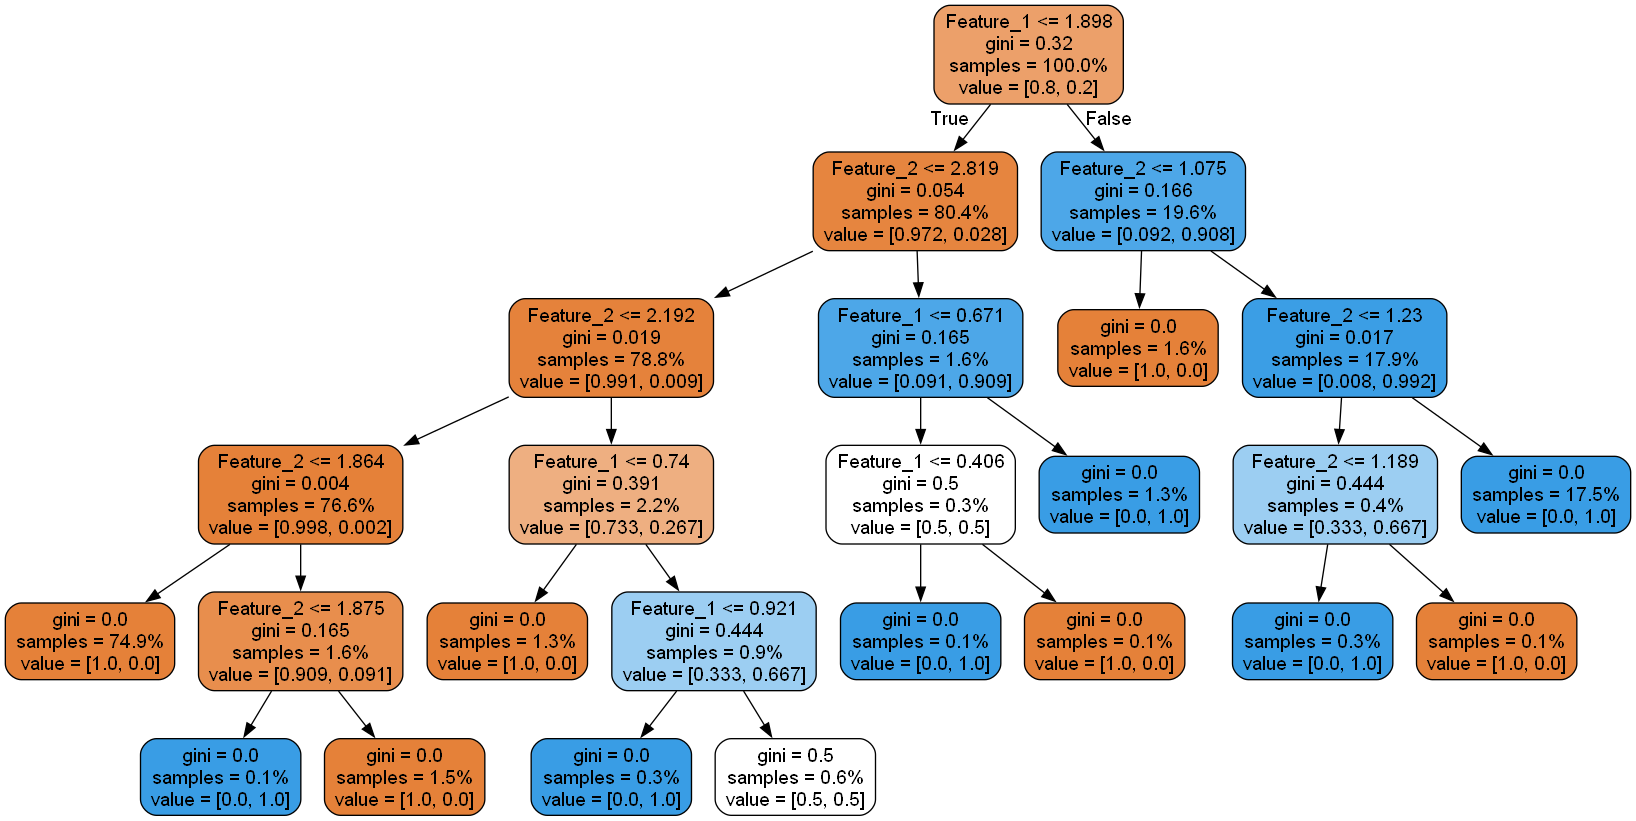

In [8]:
import pydot
from IPython.display import Image
from io import StringIO
from sklearn import tree

columns_names = df_data2.columns[:-1].tolist()
dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data, proportion = True, feature_names = columns_names, rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### 8. Visualización de la importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

Informe de Importancia de las Variables:
     Feature  Importance
0  Feature_1    0.796225
1  Feature_2    0.203775


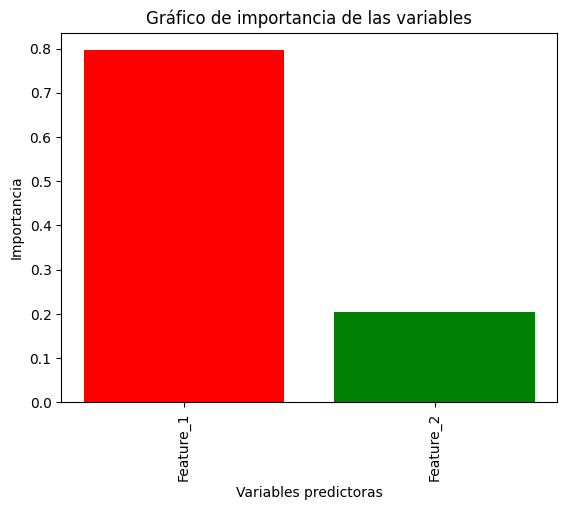

In [9]:
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
feature_names = df_data2.columns[:-1]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(feature_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()